# MULTICLASS CLASSIFICATION RECAP INCLASS 20201226

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.metrics import f1_score
font_title = {'family': 'times new roman', 'color': 'darkred',
              'weight': 'bold', 'size': 14}
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

## DATA PREPROCESSING

In [22]:
df = pd.read_csv("covtype2.csv")
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Square_Hypo_Distance,Average_Dist_Road_Hydro,Average_Elevation_Hydro
0,2596,51,3,510,221,232,6279,1,0,0,...,0,0,0,0,0,0,5,66564,384,1298
1,2590,56,2,390,220,235,6225,1,0,0,...,0,0,0,0,0,0,5,44980,301,1292
2,2804,139,9,3180,234,238,6121,1,0,0,...,0,0,0,0,0,0,2,76049,1724,1434
3,2785,155,18,3090,238,238,6211,1,0,0,...,0,0,0,0,0,0,2,72488,1666,1451
4,2595,45,2,391,220,234,6172,1,0,0,...,0,0,0,0,0,0,5,23410,272,1297


<AxesSubplot:xlabel='Cover_Type', ylabel='Size'>

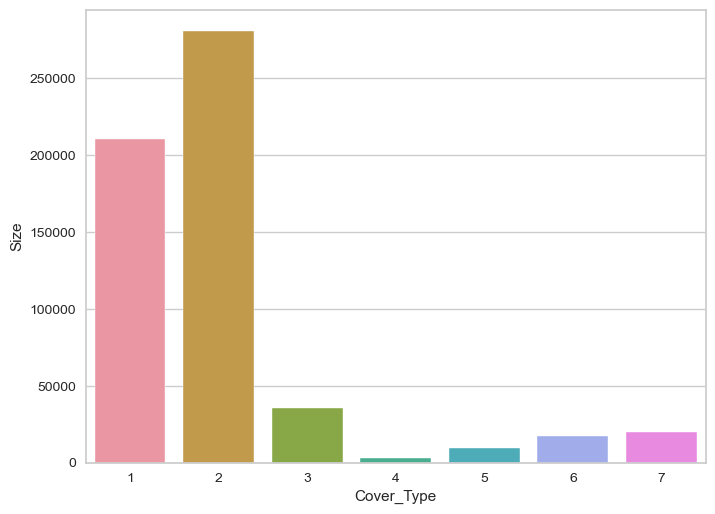

In [23]:
class_tree = df.groupby('Cover_Type').size()
class_label = pd.DataFrame(class_tree,columns = ['Size'])
plt.figure(figsize = (8,6))
sns.barplot(x = class_label.index, y = 'Size', data = class_label)

In [24]:
len(df[df["Cover_Type"]== 4 ])

2741

In [25]:
df[df["Cover_Type"] == 1] = df[df["Cover_Type"] == 1].sample(1500)

In [26]:
df[df["Cover_Type"] == 1]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Square_Hypo_Distance,Average_Dist_Road_Hydro,Average_Elevation_Hydro
108,2863.0,348.0,14.0,3918.0,193.0,216.0,5695.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,103402.0,2113.0,1476.0
196,3017.0,46.0,22.0,5118.0,221.0,188.0,2352.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47648.0,2665.0,1534.0
215,3244.0,56.0,16.0,3865.0,229.0,204.0,2225.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,387700.0,2241.0,1660.0
298,3080.0,24.0,17.0,4377.0,208.0,201.0,4176.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,462170.0,2518.0,1623.0
1049,3025.0,62.0,16.0,4821.0,232.0,205.0,1398.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,237620.0,2652.0,1541.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557631,2777.0,51.0,20.0,3240.0,225.0,192.0,2672.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,354754.0,1917.0,1375.0
557636,2724.0,35.0,19.0,3090.0,214.0,195.0,2589.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,263944.0,1800.0,1331.0
557862,2808.0,6.0,11.0,3391.0,207.0,219.0,2713.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,374225.0,1999.0,1442.0
557970,3144.0,139.0,4.0,339.0,227.0,238.0,5692.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,161089.0,369.0,1588.0


In [27]:
df[df["Cover_Type"] == 2] = df[df["Cover_Type"] == 2].sample(1500)
df[df["Cover_Type"] == 3] = df[df["Cover_Type"] == 3].sample(1500)
df[df["Cover_Type"] == 4] = df[df["Cover_Type"] == 4].sample(1500)
df[df["Cover_Type"] == 5] = df[df["Cover_Type"] == 5].sample(1500)
df[df["Cover_Type"] == 6] = df[df["Cover_Type"] == 6].sample(1500)
df[df["Cover_Type"] == 7] = df[df["Cover_Type"] == 7].sample(1500)


In [28]:
df.shape

(574967, 46)

In [29]:
df.dropna(inplace=True)

In [30]:
df.shape

(10500, 46)

<AxesSubplot:xlabel='Cover_Type', ylabel='Size'>

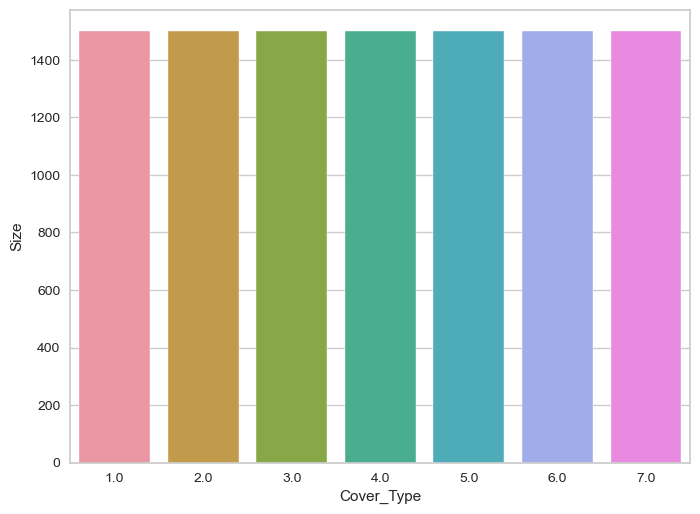

In [31]:
class_tree = df.groupby('Cover_Type').size()
class_label = pd.DataFrame(class_tree,columns = ['Size'])
plt.figure(figsize = (8,6))
sns.barplot(x = class_label.index, y = 'Size', data = class_label)

In [32]:
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40,Square_Hypo_Distance,Average_Dist_Road_Hydro,Average_Elevation_Hydro
143348,2996.0,91.0,18.0,5175.0,245.0,209.0,1959.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,156481.0,2783.0,1528.0
288322,2286.0,319.0,22.0,1187.0,158.0,214.0,685.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1960.0,614.0,1150.0
568506,2672.0,182.0,19.0,2343.0,222.0,249.0,993.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95498.0,1310.0,1404.0
495983,3281.0,17.0,26.0,1731.0,189.0,177.0,592.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,43210.0,966.0,1667.0
394479,3277.0,196.0,8.0,2249.0,219.0,247.0,2151.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,987025.0,1616.0,1707.0


In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8400 entries, 143348 to 364581
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Elevation                           8400 non-null   float64
 1   Aspect                              8400 non-null   float64
 2   Slope                               8400 non-null   float64
 3   Horizontal_Distance_To_Roadways     8400 non-null   float64
 4   Hillshade_9am                       8400 non-null   float64
 5   Hillshade_Noon                      8400 non-null   float64
 6   Horizontal_Distance_To_Fire_Points  8400 non-null   float64
 7   Wilderness_Area1                    8400 non-null   float64
 8   Wilderness_Area2                    8400 non-null   float64
 9   Wilderness_Area3                    8400 non-null   float64
 10  Wilderness_Area4                    8400 non-null   float64
 11  Soil_Type1                          

In [36]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [37]:
df.shape

(10500, 46)

## XGBOOST CLASSIFIER

In [38]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
y_pred = xgb_classifier.predict(X_test)

In [40]:
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_accuracy

0.8342857142857143

In [41]:
xgb_f1 = f1_score(y_test, y_pred, average='macro')
xgb_f1

0.8283809789080906

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.72      0.71      0.71       302
         2.0       0.67      0.60      0.64       288
         3.0       0.84      0.75      0.80       273
         4.0       0.94      0.97      0.95       309
         5.0       0.87      0.94      0.91       326
         6.0       0.83      0.88      0.85       298
         7.0       0.92      0.96      0.94       304

    accuracy                           0.83      2100
   macro avg       0.83      0.83      0.83      2100
weighted avg       0.83      0.83      0.83      2100



In [75]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[193,  34,   1,   0,  16,   2,  56],
       [ 83, 121,   6,   0,  68,   5,   5],
       [  0,   2, 182,  30,  10,  49,   0],
       [  0,   0,   6, 297,   0,   6,   0],
       [  2,  20,   9,   0, 287,   8,   0],
       [  0,   0,  53,  17,  23, 205,   0],
       [ 27,   0,   0,   0,   2,   0, 275]], dtype=int64)

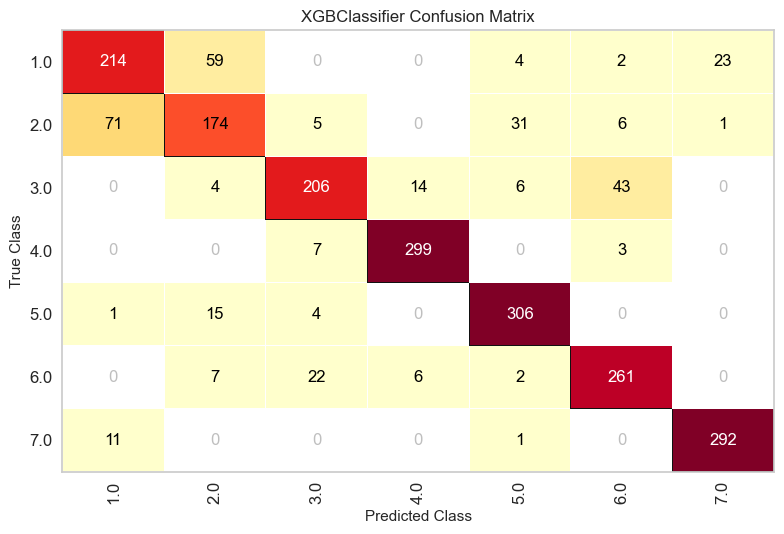

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [43]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(xgb_classifier)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show()


## TUNNING XGBOOST

In [46]:
xgb = XGBClassifier()

In [47]:
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

In [48]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 2,
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 2 folds for each of 81 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 27.5min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 30.7min finished


In [51]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}

In [52]:
xgb_tuned = XGBClassifier(learning_rate= 0.1, 
                                max_depth= 7, 
                                n_estimators= 300, 
                                subsample= 0.8).fit(X_train, y_train)

In [53]:
y_pred = xgb_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[214,  58,   0,   0,   4,   1,  25],
       [ 61, 187,   7,   0,  26,   6,   1],
       [  0,   4, 216,  14,   5,  34,   0],
       [  0,   0,   8, 297,   0,   4,   0],
       [  1,  14,   4,   0, 306,   1,   0],
       [  0,   6,  21,   7,   2, 262,   0],
       [  9,   0,   0,   0,   1,   0, 294]], dtype=int64)

In [54]:
xgb_f1_tuned = f1_score(y_test, y_pred, average='macro')
xgb_f1_tuned

0.8407165675725168

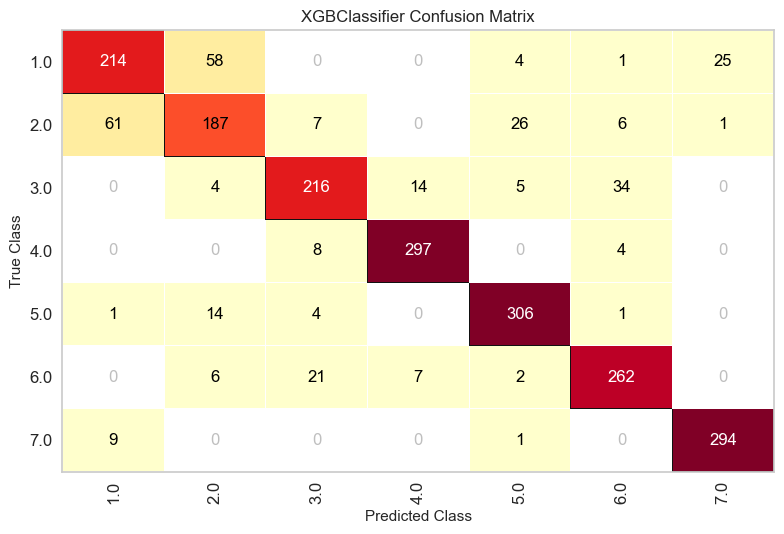

<AxesSubplot:title={'center':'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [55]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(xgb_tuned)
# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)
# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)
cm.show()

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.75      0.71      0.73       302
         2.0       0.70      0.65      0.67       288
         3.0       0.84      0.79      0.82       273
         4.0       0.93      0.96      0.95       309
         5.0       0.89      0.94      0.91       326
         6.0       0.85      0.88      0.86       298
         7.0       0.92      0.97      0.94       304

    accuracy                           0.85      2100
   macro avg       0.84      0.84      0.84      2100
weighted avg       0.84      0.85      0.84      2100



## XGBOOST SCALED

In [57]:
xgb_tuned_scaled = XGBClassifier(learning_rate= 0.1,
                                max_depth= 7,
                                n_estimators= 300,
                                subsample= 0.8).fit(X_train_scaled, y_train)

In [58]:
y_pred = xgb_tuned_scaled.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[217,  55,   0,   0,   4,   1,  25],
       [ 61, 185,   7,   0,  28,   6,   1],
       [  0,   3, 211,  13,   6,  40,   0],
       [  0,   0,   8, 299,   0,   2,   0],
       [  0,  13,   3,   0, 309,   1,   0],
       [  0,   6,  21,   7,   2, 262,   0],
       [  8,   0,   0,   0,   1,   0, 295]], dtype=int64)

In [59]:
xgb_f1_tuned_scaled = f1_score(y_test, y_pred, average='macro')
xgb_f1_tuned_scaled

0.8410218217515585

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.76      0.72      0.74       302
         2.0       0.71      0.64      0.67       288
         3.0       0.84      0.77      0.81       273
         4.0       0.94      0.97      0.95       309
         5.0       0.88      0.95      0.91       326
         6.0       0.84      0.88      0.86       298
         7.0       0.92      0.97      0.94       304

    accuracy                           0.85      2100
   macro avg       0.84      0.84      0.84      2100
weighted avg       0.84      0.85      0.84      2100



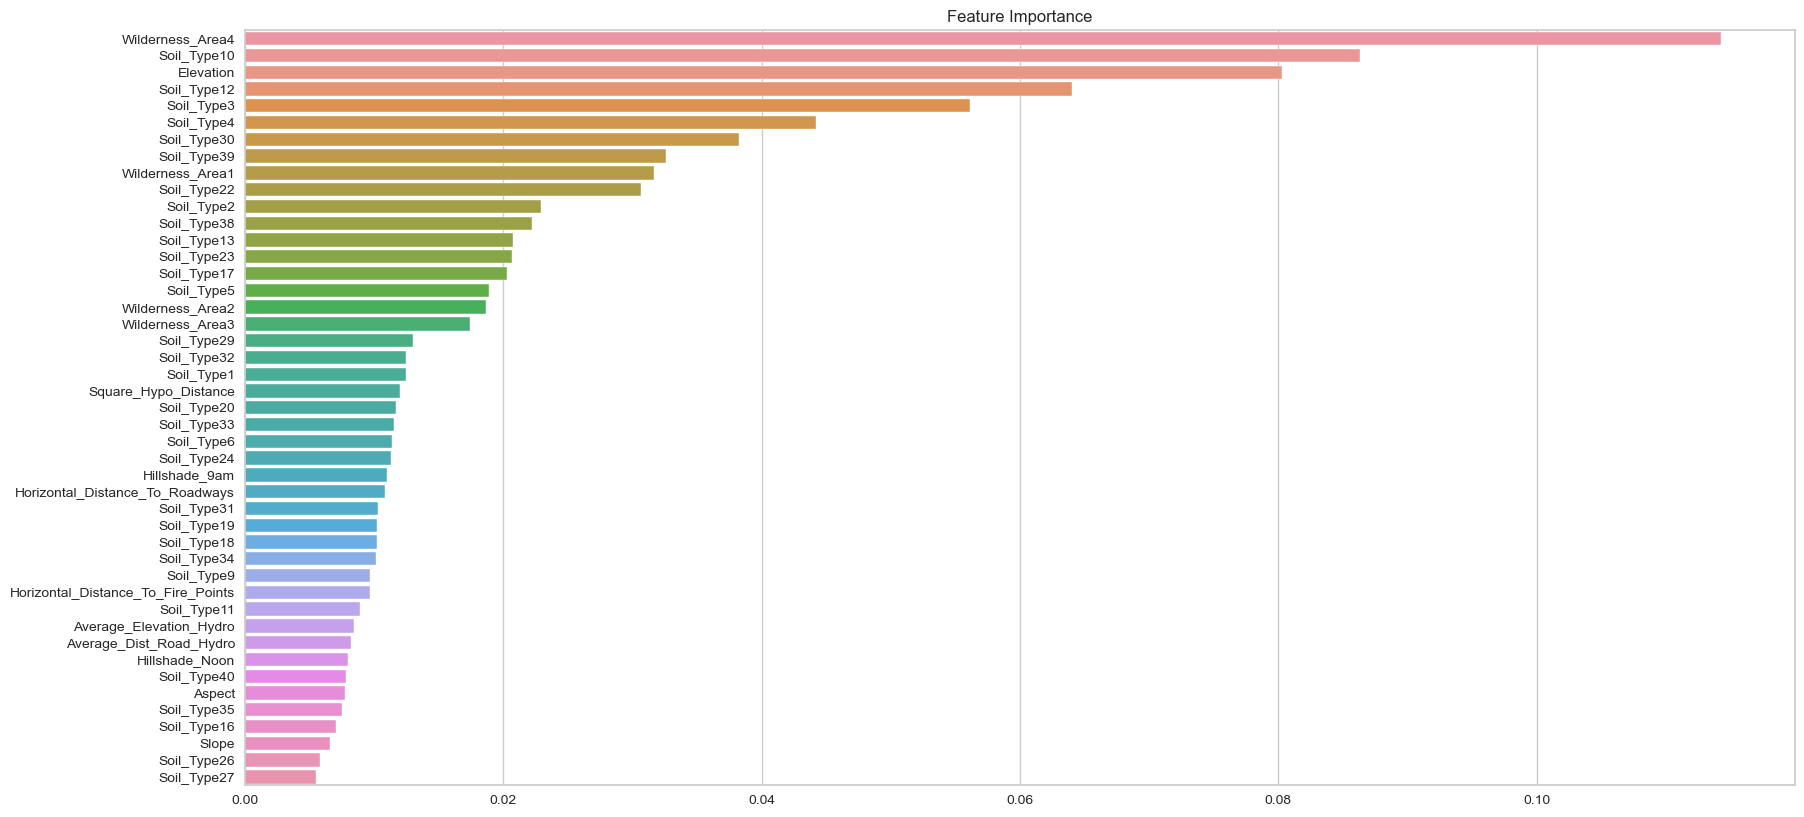

In [61]:
plt.figure(figsize=(20,10))

feature_imp = pd.Series(xgb_tuned_scaled.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

## RANDOM FOREST

In [62]:
rf_model=RandomForestClassifier().fit(X_train, y_train)

In [63]:
y_pred_rf = rf_model.predict(X_test)
confusion_matrix(y_test, y_pred_rf)

array([[218,  48,   1,   0,   6,   1,  28],
       [ 67, 176,   4,   0,  32,   6,   3],
       [  0,   2, 216,  16,   5,  34,   0],
       [  0,   0,   5, 302,   0,   2,   0],
       [  2,  10,   1,   0, 310,   3,   0],
       [  0,   4,  18,   9,   3, 264,   0],
       [  7,   0,   0,   0,   1,   0, 296]], dtype=int64)

In [64]:
rf_f1 = f1_score(y_test, y_pred_rf, average='macro')
rf_f1

0.8423209912565163

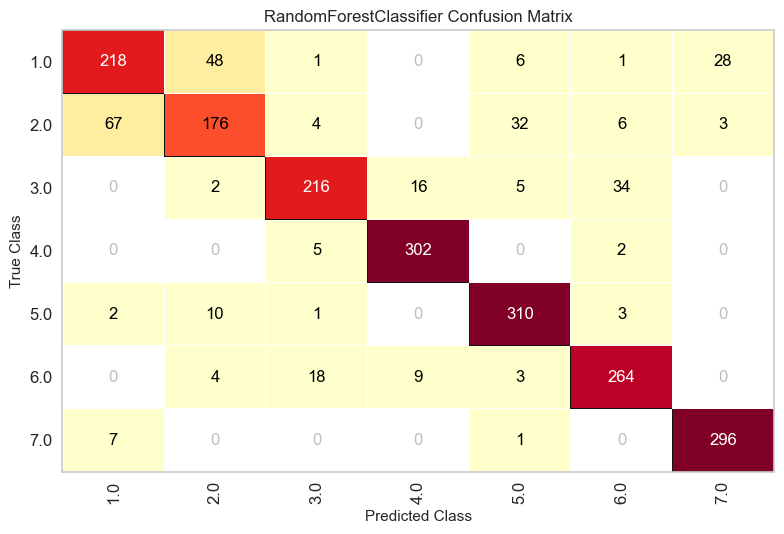

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [65]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(rf_model)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show()

In [66]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         1.0       0.74      0.72      0.73       302
         2.0       0.73      0.61      0.67       288
         3.0       0.88      0.79      0.83       273
         4.0       0.92      0.98      0.95       309
         5.0       0.87      0.95      0.91       326
         6.0       0.85      0.89      0.87       298
         7.0       0.91      0.97      0.94       304

    accuracy                           0.85      2100
   macro avg       0.84      0.84      0.84      2100
weighted avg       0.84      0.85      0.84      2100



## RANDOM FOREST TUNNING

In [67]:
rf = RandomForestClassifier()

In [68]:
rf_params = {"n_estimators":[50, 100, 300],
              "max_depth":[3,5,7],
              "max_features": [2,4,6,8],
              "min_samples_split": [2,4,6]}

In [69]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 12.4min finished


In [70]:
rf_cv_model.best_params_

{'max_depth': 7,
 'max_features': 8,
 'min_samples_split': 6,
 'n_estimators': 100}

In [71]:
rf_tuned = RandomForestClassifier(max_depth = 7,
                                  max_features = 8,
                                  min_samples_split = 2,
                                  n_estimators = 300).fit(X_train, y_train)

In [72]:
y_pred = rf_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[193,  34,   1,   0,  16,   2,  56],
       [ 83, 121,   6,   0,  68,   5,   5],
       [  0,   2, 182,  30,  10,  49,   0],
       [  0,   0,   6, 297,   0,   6,   0],
       [  2,  20,   9,   0, 287,   8,   0],
       [  0,   0,  53,  17,  23, 205,   0],
       [ 27,   0,   0,   0,   2,   0, 275]], dtype=int64)

In [73]:
rf_f1_tuned = f1_score(y_test, y_pred, average='macro')
rf_f1_tuned

0.7302635663282823

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.63      0.64      0.64       302
         2.0       0.68      0.42      0.52       288
         3.0       0.71      0.67      0.69       273
         4.0       0.86      0.96      0.91       309
         5.0       0.71      0.88      0.78       326
         6.0       0.75      0.69      0.72       298
         7.0       0.82      0.90      0.86       304

    accuracy                           0.74      2100
   macro avg       0.74      0.74      0.73      2100
weighted avg       0.74      0.74      0.73      2100



## RANDOM FOREST SCALE

In [77]:
rf_tuned_scaled = RandomForestClassifier(max_depth = 7,             
                                  max_features = 8, 
                                  min_samples_split = 2, 
                                  n_estimators = 100).fit(X_train_scaled, y_train)

In [78]:
y_pred = rf_tuned_scaled.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[193,  35,   1,   0,  19,   2,  52],
       [ 85, 117,   5,   0,  71,   5,   5],
       [  0,   3, 182,  34,  10,  44,   0],
       [  0,   0,   5, 299,   0,   5,   0],
       [  1,  21,  10,   0, 286,   8,   0],
       [  0,   0,  61,  16,  23, 198,   0],
       [ 24,   0,   0,   0,   2,   0, 278]], dtype=int64)

In [79]:
rf_f1_tuned_scaled = f1_score(y_test, y_pred, average='macro')
rf_f1_tuned_scaled

0.7260504458195548

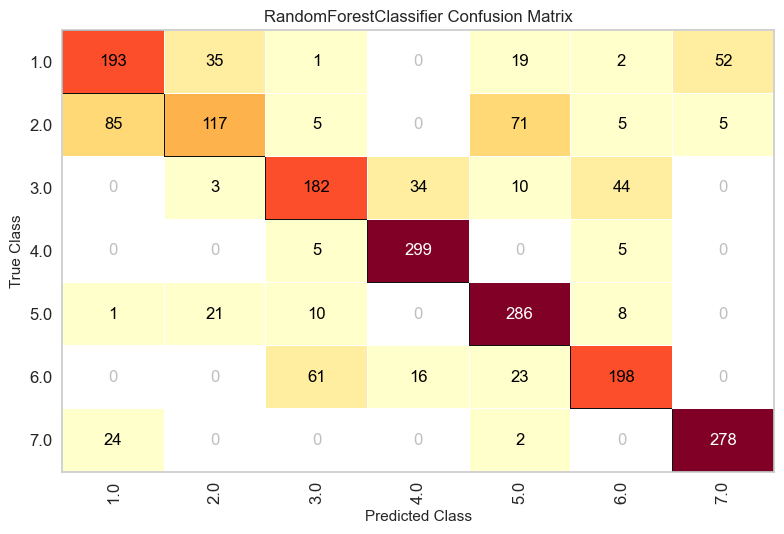

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [80]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(rf_tuned_scaled)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_scaled, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test_scaled, y_test)

cm.show()

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.64      0.64      0.64       302
         2.0       0.66      0.41      0.50       288
         3.0       0.69      0.67      0.68       273
         4.0       0.86      0.97      0.91       309
         5.0       0.70      0.88      0.78       326
         6.0       0.76      0.66      0.71       298
         7.0       0.83      0.91      0.87       304

    accuracy                           0.74      2100
   macro avg       0.73      0.73      0.73      2100
weighted avg       0.73      0.74      0.73      2100



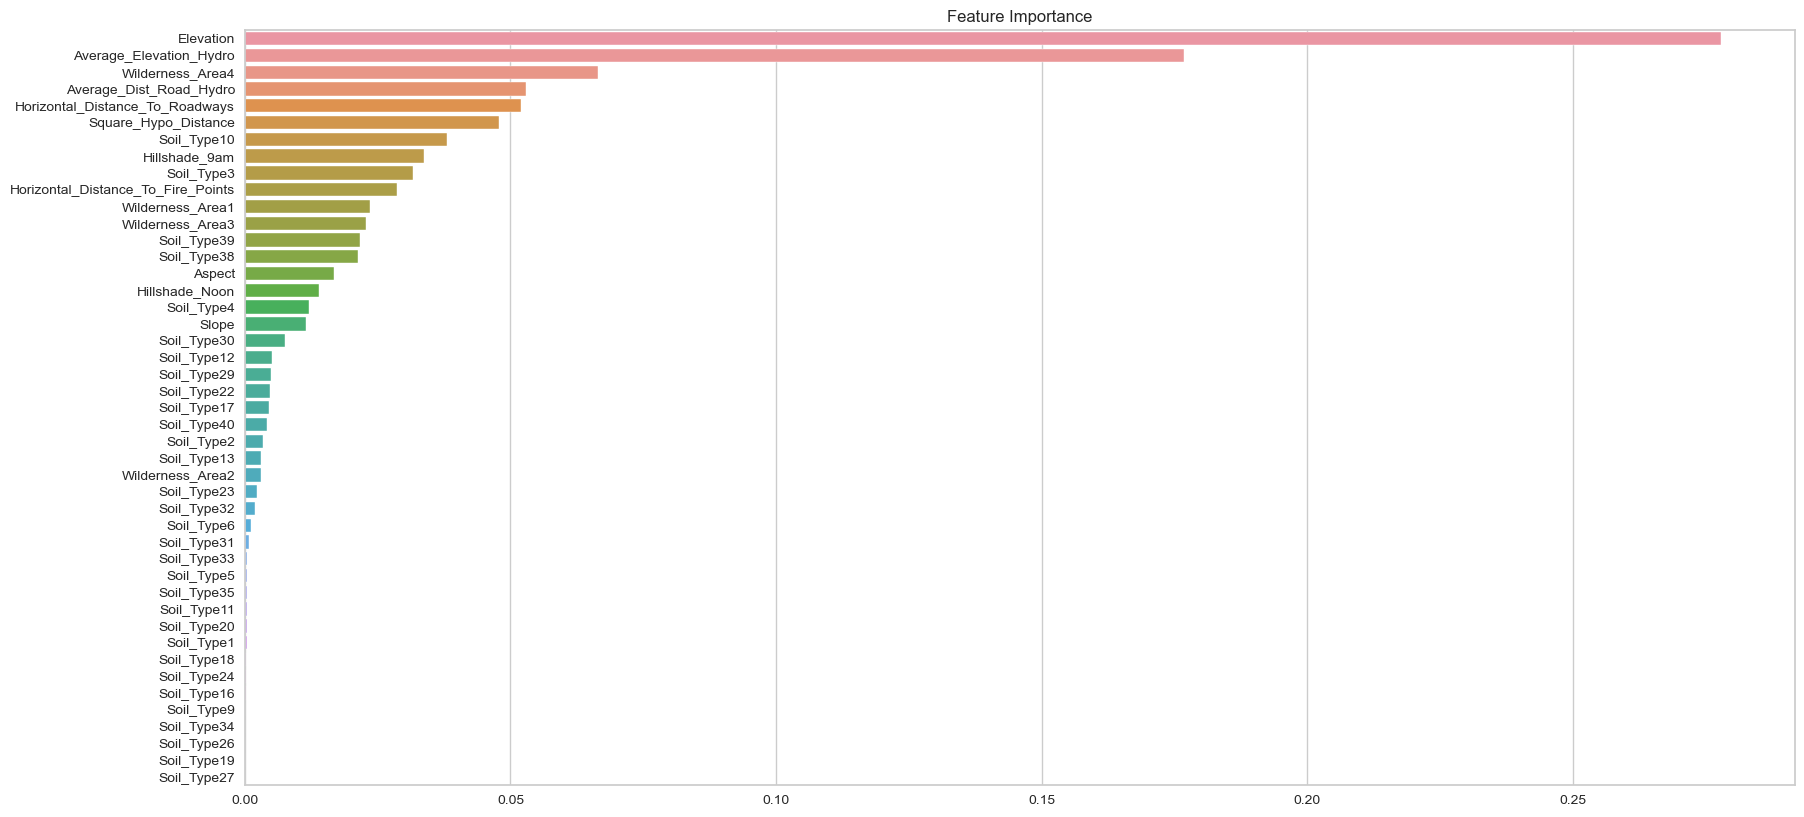

In [82]:
plt.figure(figsize=(20,10))
feature_imp = pd.Series(rf_tuned_scaled.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

## DECISION TREE

In [84]:
modelTree = DecisionTreeClassifier()

In [85]:
modelTree.fit(X_train , y_train)

DecisionTreeClassifier()

In [86]:
y_pred = modelTree.predict(X_test)

In [87]:
tree_f1 = f1_score(y_test, y_pred, average='macro')
tree_f1

0.7593885301022542

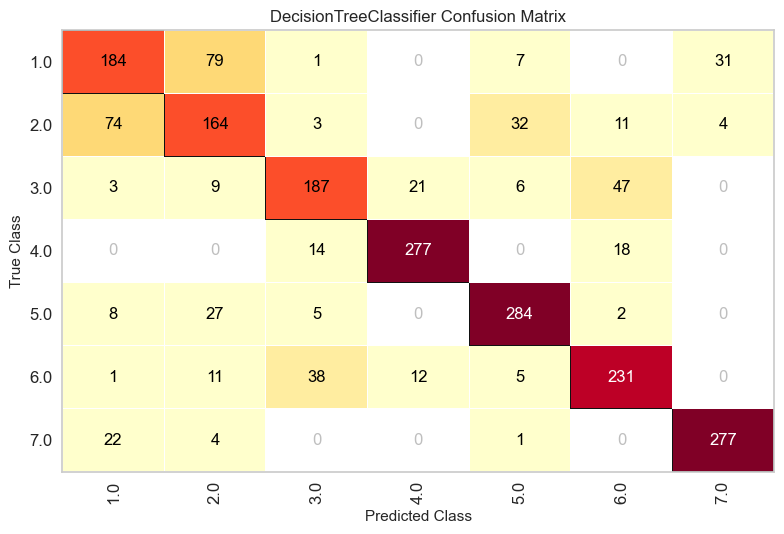

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [88]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(modelTree)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

cm.show()

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.63      0.61      0.62       302
         2.0       0.56      0.57      0.56       288
         3.0       0.75      0.68      0.72       273
         4.0       0.89      0.90      0.89       309
         5.0       0.85      0.87      0.86       326
         6.0       0.75      0.78      0.76       298
         7.0       0.89      0.91      0.90       304

    accuracy                           0.76      2100
   macro avg       0.76      0.76      0.76      2100
weighted avg       0.76      0.76      0.76      2100



Text(0.5, 1.0, 'F1 Score of Different Models')

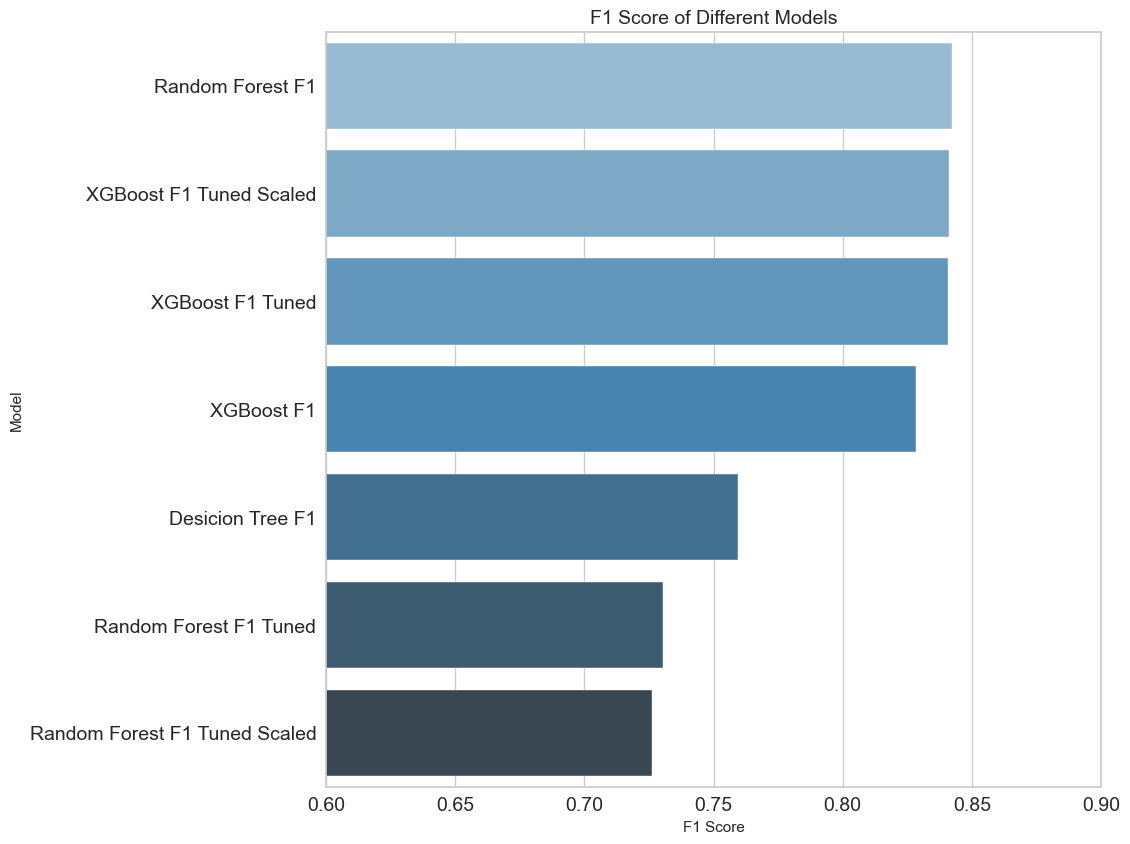

In [91]:
compare = pd.DataFrame({"Model": ["XGBoost F1", "XGBoost F1 Tuned", "XGBoost F1 Tuned Scaled", "Random Forest F1",
                                  "Random Forest F1 Tuned","Random Forest F1 Tuned Scaled","Desicion Tree F1"],
                        "F1 Score": [xgb_f1, xgb_f1_tuned, xgb_f1_tuned_scaled, rf_f1, rf_f1_tuned, rf_f1_tuned_scaled,tree_f1]})

compare = compare.sort_values(by="F1 Score", ascending=False)

plt.figure(figsize=(10,10))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
ax.set_xlim(.60, .90)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("F1 Score of Different Models", size=14)